[step: 0] loss: 262.9931640625
[step: 1] loss: 118.51603698730469
[step: 2] loss: 36.704124450683594
[step: 3] loss: 4.886346817016602
[step: 4] loss: 9.418209075927734
[step: 5] loss: 29.854576110839844
[step: 6] loss: 43.40565490722656
[step: 7] loss: 43.152122497558594
[step: 8] loss: 33.69310760498047
[step: 9] loss: 21.54035186767578
[step: 10] loss: 11.30723762512207
[step: 11] loss: 5.102068901062012
[step: 12] loss: 3.0664315223693848
[step: 13] loss: 4.188971996307373
[step: 14] loss: 7.026111602783203
[step: 15] loss: 10.203548431396484
[step: 16] loss: 12.697429656982422
[step: 17] loss: 13.938872337341309
[step: 18] loss: 13.793004989624023
[step: 19] loss: 12.462532043457031
[step: 20] loss: 10.359817504882812
[step: 21] loss: 7.979033946990967
[step: 22] loss: 5.786680221557617
[step: 23] loss: 4.138731956481934
[step: 24] loss: 3.2284789085388184
[step: 25] loss: 3.0678935050964355
[step: 26] loss: 3.504556179046631
[step: 27] loss: 4.272397518157959
[step: 28] loss: 5.0

[step: 241] loss: 1.2980395555496216
[step: 242] loss: 1.2967703342437744
[step: 243] loss: 1.2955031394958496
[step: 244] loss: 1.2942380905151367
[step: 245] loss: 1.2929751873016357
[step: 246] loss: 1.2917141914367676
[step: 247] loss: 1.290454626083374
[step: 248] loss: 1.2891974449157715
[step: 249] loss: 1.287941813468933
[step: 250] loss: 1.2866878509521484
[step: 251] loss: 1.2854359149932861
[step: 252] loss: 1.2841854095458984
[step: 253] loss: 1.2829370498657227
[step: 254] loss: 1.2816898822784424
[step: 255] loss: 1.2804447412490845
[step: 256] loss: 1.2792003154754639
[step: 257] loss: 1.277957797050476
[step: 258] loss: 1.276716947555542
[step: 259] loss: 1.2754771709442139
[step: 260] loss: 1.2742385864257812
[step: 261] loss: 1.2730019092559814
[step: 262] loss: 1.271765947341919
[step: 263] loss: 1.2705317735671997
[step: 264] loss: 1.269299030303955
[step: 265] loss: 1.2680660486221313
[step: 266] loss: 1.2668349742889404
[step: 267] loss: 1.2656056880950928
[step: 

[step: 471] loss: 1.0279433727264404
[step: 472] loss: 1.0269027948379517
[step: 473] loss: 1.0258655548095703
[step: 474] loss: 1.0248303413391113
[step: 475] loss: 1.0237979888916016
[step: 476] loss: 1.0227687358856201
[step: 477] loss: 1.021742582321167
[step: 478] loss: 1.0207188129425049
[step: 479] loss: 1.0196980237960815
[step: 480] loss: 1.0186800956726074
[step: 481] loss: 1.0176653861999512
[step: 482] loss: 1.0166535377502441
[step: 483] loss: 1.0156444311141968
[step: 484] loss: 1.0146387815475464
[step: 485] loss: 1.0136356353759766
[step: 486] loss: 1.0126361846923828
[step: 487] loss: 1.0116394758224487
[step: 488] loss: 1.010646104812622
[step: 489] loss: 1.0096558332443237
[step: 490] loss: 1.0086688995361328
[step: 491] loss: 1.0076851844787598
[step: 492] loss: 1.0067052841186523
[step: 493] loss: 1.0057274103164673
[step: 494] loss: 1.0047540664672852
[step: 495] loss: 1.0037837028503418
[step: 496] loss: 1.0028164386749268
[step: 497] loss: 1.0018529891967773
[st

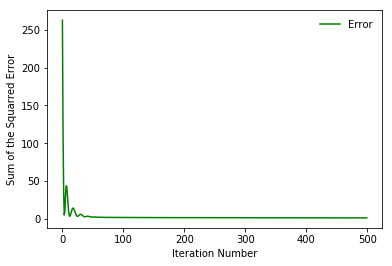

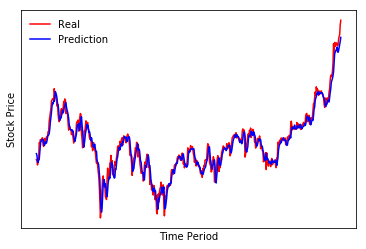

In [1]:
#https://github.com/JKKorea/rnn_stock_predictions 참조
#RNN + Fully connected layer
#Train : Test = 70 : 30
#Train Period = 2010.1.2~2017.5.27
#Predictions Period = 2017.5.28~2017.6.7
#Real Period = 2017.6.8

from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # reproducibility

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# train Parameters
timesteps = seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learing_rate = 0.01
iterations = 500

# Choose stock
stock = "KRX:KOSPI"

# data scrolling parts
from pandas_datareader import data, wb  
import datetime

start = datetime.datetime(2010, 1, 2)
end = datetime.datetime(2017, 5, 27)
df = data.DataReader(  
    stock,        # name
    "google",           # data source
    start,   # start
    end   # end
)

# Convert pandas dataframe to numpy array
xy = df.as_matrix()

# Open, High, Low, Volume, Close
test_min = np.min(xy,0)
test_max = np.max(xy,0)
denom = test_max - test_min

xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-2]]  # Close as label

# Test
start = datetime.datetime(2017, 5, 28)
end = datetime.datetime(2017, 6, 7)
df = data.DataReader(  
    stock,        # name
    "google",           # data source
    start,   # start
    end   # end
)

test_last_X = df.as_matrix().reshape(1,7,5)
test_last_min = np.min(test_last_X, 0)
test_last_max = np.max(test_last_X, 0)
test_last_denom = test_last_max - test_last_min

# Real
start = datetime.datetime(2017, 6, 8)
end = datetime.datetime(2017, 6, 8)
df = data.DataReader(  
    stock,        # name
    "google",           # data source
    start,   # start
    end   # end
)

real = df.as_matrix()


# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
   # print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split 70 / 30
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim], name='input_X')
Y = tf.placeholder(tf.float32, [None, 1], name='intput_Y')

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y), name='losses_sum')  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(learing_rate)
train = optimizer.minimize(loss, name='train')

# RMSE
targets = tf.placeholder(tf.float32, [None, 1], name='targets')
predictions = tf.placeholder(tf.float32, [None, 1], name='predictions')
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)), name='rmse')

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Tensorboard
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./tensorflowlog", sess.graph)
    
    losslist = [];    
    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
        losslist = np.append(losslist, step_loss)

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse))

    # Predictions test
    prediction_test = sess.run(Y_pred, feed_dict={X: test_last_X})
    print("real ", end='')
    print(real[0][-2])

    print("predictions ", end='')
    print((prediction_test*test_last_denom + test_last_min)[-1][-2])

    # Plot losss
    plt.figure(1)
    plt.plot(losslist, color ="green", label ="Error");
    plt.xlabel("Iteration Number")
    plt.ylabel("Sum of the Squarred Error")
    plt.legend(loc='upper right', frameon=False)

    # Plot predictions
    plt.figure(2) 
    plt.plot(testY, color ="red", label ="Real")
    plt.plot(test_predict, color ="blue", label ="Prediction")
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.legend(loc='upper left', frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.show()